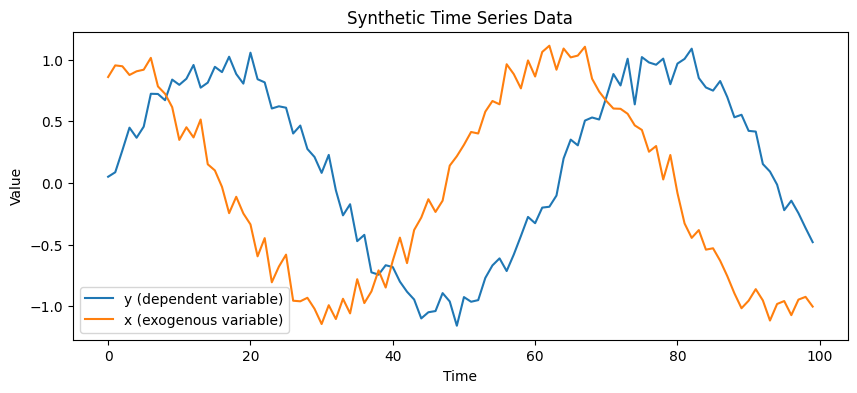

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
n = 100  # Number of data points
time = np.arange(n)

# Dependent variable (y) - e.g., a sine wave with noise
y = np.sin(0.1 * time) + np.random.normal(0, 0.1, n)

# Exogenous variable (x) - e.g., a cosine wave with noise
x = np.cos(0.1 * time) + np.random.normal(0, 0.1, n)

# Convert to a pandas DataFrame
df = pd.DataFrame({'y': y, 'x': x})

# Plot the time series data
plt.figure(figsize=(10, 4))
plt.plot(df['y'], label='y (dependent variable)')
plt.plot(df['x'], label='x (exogenous variable)')
plt.title('Synthetic Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


In [39]:
import statsmodels.api as sm

# Define the lag order
p = 2  # Number of lags for y
q = 2  # Number of lags for x

# Prepare the lagged data
Y = df['y'].values
X = df['x'].values

Y_lagged = np.array([Y[i-p:i] for i in range(p, len(Y))])
X_lagged = np.array([X[i-q:i] for i in range(q, len(X))])

# Combine lagged values into a single matrix
Z = np.hstack([Y_lagged, X_lagged])

# Dependent variable adjusted for lags
Y = Y[max(p, q):]

# Add a constant term for the intercept
Z = sm.add_constant(Z)

# Fit the ARX model
model = sm.OLS(Y, Z).fit()

# Print model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     829.4
Date:                Wed, 12 Jun 2024   Prob (F-statistic):           8.35e-72
Time:                        18:35:41   Log-Likelihood:                 75.799
No. Observations:                  98   AIC:                            -141.6
Df Residuals:                      93   BIC:                            -128.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0017      0.012      0.138      0.8

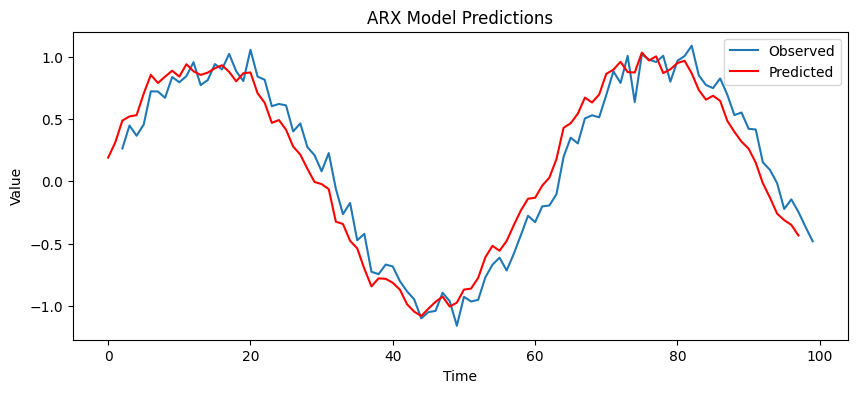

In [40]:
# Make predictions
preds = model.predict(Z)

# Plot the observed data and the predictions
plt.figure(figsize=(10, 4))
plt.plot(df['y'][max(p, q):], label='Observed')
plt.plot(preds, label='Predicted', color='red')
plt.title('ARX Model Predictions')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()
